In [1]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import pandas as pd
titanic_df = pd.read_csv("https://raw.githubusercontent.com/Somyadhariwal/SD_MLAP/main/titanic.csv")

In [13]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [30]:
df = titanic_df
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)
df = df.drop('Cabin', axis=1)
df = df.drop('Embarked', axis=1)
df = df.drop('PassengerId', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [31]:
df.fillna(0, inplace=True)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Survived',
                                                'Pclass',
                                                'Age',
                                                'SibSp',
                                                'Parch',
                                                'Fare']] )

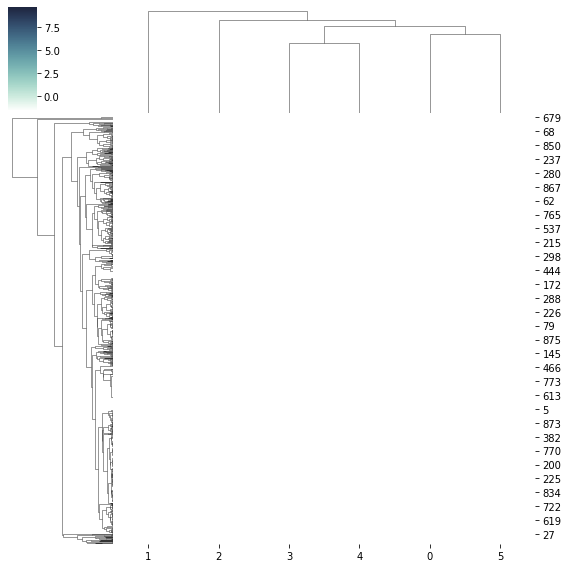

In [45]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_df, cmap=cmap, linewidths=.2,
              figsize = (8,8) );

In [46]:
df.iloc[[10,16]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
10,1,3,9,4.0,1,1,16.700
16,0,3,7,2.0,4,1,29.125


In [47]:
df.iloc[[2,18]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
2,1,3,35,26.0,0,0,7.925
18,0,3,42,31.0,1,0,18.000


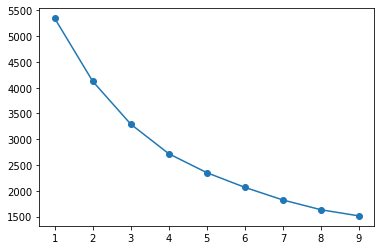

In [48]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

In [49]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform( df[['Survived',
                                                'Pclass',
                                                'Age',
                                                'SibSp',
                                                'Parch',
                                                'Fare']] )

In [51]:
k = 3
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_df )
df["clusterid"] = clusters.labels_

In [52]:
df[df.clusterid == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid
7,0,3,7,2.0,3,1,21.0750,0
13,0,3,53,39.0,1,5,31.2750,0
16,0,3,7,2.0,4,1,29.1250,0
24,0,3,13,8.0,3,1,21.0750,0
25,1,3,52,38.0,1,5,31.3875,0
...,...,...,...,...,...,...,...,...
850,0,3,9,4.0,4,2,31.2750,0
858,1,3,32,24.0,0,3,19.2583,0
863,0,3,0,0.0,8,2,69.5500,0
885,0,3,53,39.0,0,5,29.1250,0


In [53]:
df[df.clusterid == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid
0,0,3,29,22.0,1,0,7.2500,1
2,1,3,35,26.0,0,0,7.9250,1
4,0,3,48,35.0,0,0,8.0500,1
5,0,3,0,0.0,0,0,8.4583,1
8,1,3,36,27.0,0,2,11.1333,1
...,...,...,...,...,...,...,...,...
882,0,3,29,22.0,0,0,10.5167,1
883,0,2,37,28.0,0,0,10.5000,1
884,0,3,34,25.0,0,0,7.0500,1
886,0,2,36,27.0,0,0,13.0000,1


In [54]:
df[df.clusterid == 2]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid
1,1,1,52,38.0,1,0,71.2833,2
3,1,1,48,35.0,1,0,53.1000,2
6,0,1,70,54.0,0,0,51.8625,2
9,1,2,19,14.0,1,0,30.0708,2
11,1,1,75,58.0,0,0,26.5500,2
...,...,...,...,...,...,...,...,...
874,1,2,37,28.0,1,0,24.0000,2
879,1,1,73,56.0,0,1,83.1583,2
880,1,2,34,25.0,0,1,26.0000,2
887,1,1,25,19.0,0,0,30.0000,2


In [55]:
from sklearn.cluster import AgglomerativeClustering

In [56]:
h_clusters = AgglomerativeClustering( 3 )
h_clusters.fit( scaled_df )
df["h_clusterid"] = h_clusters.labels_

In [57]:
df[df.h_clusterid == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid,h_clusterid
1,1,1,52,38.0,1,0,71.2833,2,0
2,1,3,35,26.0,0,0,7.9250,1,0
3,1,1,48,35.0,1,0,53.1000,2,0
6,0,1,70,54.0,0,0,51.8625,2,0
8,1,3,36,27.0,0,2,11.1333,1,0
...,...,...,...,...,...,...,...,...,...
880,1,2,34,25.0,0,1,26.0000,2,0
883,0,2,37,28.0,0,0,10.5000,1,0
886,0,2,36,27.0,0,0,13.0000,1,0
887,1,1,25,19.0,0,0,30.0000,2,0


In [58]:
df[df.h_clusterid == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid,h_clusterid
7,0,3,7,2.0,3,1,21.0750,0,1
13,0,3,53,39.0,1,5,31.2750,0,1
16,0,3,7,2.0,4,1,29.1250,0,1
24,0,3,13,8.0,3,1,21.0750,0,1
25,1,3,52,38.0,1,5,31.3875,0,1
50,0,3,12,7.0,4,1,39.6875,0,1
59,0,3,16,11.0,5,2,46.9000,0,1
63,0,3,9,4.0,3,2,27.9000,0,1
68,1,3,23,17.0,4,2,7.9250,0,1
71,0,3,22,16.0,5,2,46.9000,0,1


In [59]:
df[df.h_clusterid == 2]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid,h_clusterid
0,0,3,29,22.0,1,0,7.2500,1,2
4,0,3,48,35.0,0,0,8.0500,1,2
5,0,3,0,0.0,0,0,8.4583,1,2
12,0,3,26,20.0,0,0,8.0500,1,2
14,0,3,19,14.0,0,0,7.8542,1,2
...,...,...,...,...,...,...,...,...,...
881,0,3,45,33.0,0,0,7.8958,1,2
882,0,3,29,22.0,0,0,10.5167,1,2
884,0,3,34,25.0,0,0,7.0500,1,2
888,0,3,0,0.0,1,2,23.4500,0,2


In [35]:
from sklearn.preprocessing import LabelEncoder

In [37]:
encoder = LabelEncoder()
encoded_sex = encoder.fit_transform(df.iloc[:, 3])

In [38]:
df['Sex'] = encoded_sex

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,29,22.0,1,0,7.2500
1,1,1,52,38.0,1,0,71.2833
2,1,3,35,26.0,0,0,7.9250
3,1,1,48,35.0,1,0,53.1000
4,0,3,48,35.0,0,0,8.0500


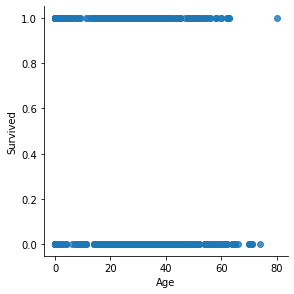

In [65]:
sn.lmplot( "Age", "Survived", data= df, fit_reg = False, size = 4 );

In [67]:
from sklearn.cluster import KMeans
clusters = KMeans( 3 )
clusters.fit( df )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
df["clusterid"] = clusters.labels_

In [69]:
df[0:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid,h_clusterid
0,0,3,29,22.0,1,0,7.2500,0,2
1,1,1,52,38.0,1,0,71.2833,1,0
2,1,3,35,26.0,0,0,7.9250,0,0
3,1,1,48,35.0,1,0,53.1000,1,0
4,0,3,48,35.0,0,0,8.0500,1,2


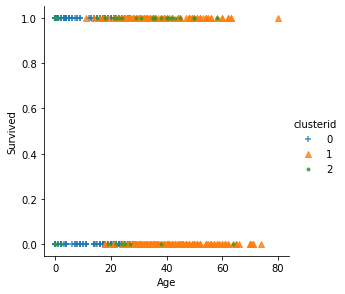

In [70]:
markers = ['+','^','.']
sn.lmplot( "Age", "Survived",
data=df,
hue = "clusterid",
fit_reg=False,
markers = markers,
size = 4 );


In [72]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(
  df[["Age", "Survived", "Parch", "Sex", "SibSp", "Fare", "Pclass"]] )
scaled_df[0:5]

array([[-0.78927234,  0.82737724, -0.10231279,  0.43279337, -0.47367361,
        -0.50244517],
       [ 1.2669898 , -1.56610693,  0.80749164,  0.43279337, -0.47367361,
         0.78684529],
       [ 1.2669898 ,  0.82737724,  0.12513832, -0.4745452 , -0.47367361,
        -0.48885426],
       [ 1.2669898 , -1.56610693,  0.63690331,  0.43279337, -0.47367361,
         0.42073024],
       [-0.78927234,  0.82737724,  0.63690331, -0.4745452 , -0.47367361,
        -0.48633742]])

In [74]:
from sklearn.cluster import KMeans
new = KMeans( 3, random_state=42 )
new.fit( scaled_df )
df["clusterid_new"] = new.labels_

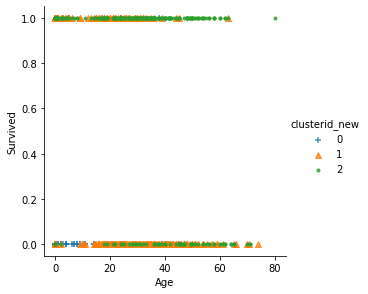

In [77]:
markers = ['+','^','.']
sn.lmplot( "Age", "Survived",
data=df,
hue = "clusterid_new",
fit_reg=False,
markers = markers,
size = 4 );

In [79]:
df.groupby( 'clusterid' )['Age',
'Survived'].agg( ["mean",
'std'] ).reset_index()

clusterid        Age             Survived          
                  mean        std      mean       std
0         0  10.932359  10.491890  0.331169  0.471144
1         1  38.489770  11.550720  0.411765  0.492784
2         2  29.076842  17.128498  0.736842  0.446258